<a href="https://colab.research.google.com/github/Onehundredpunches/AI_W9_31_03_23/blob/main/AI_W9_31_03_23_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from keras.datasets import cifar10

# load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x=x_test
y=y_test

In [56]:
x_train.shape


(50000, 32, 32, 3)

In [57]:
y_train.shape

(50000, 1)

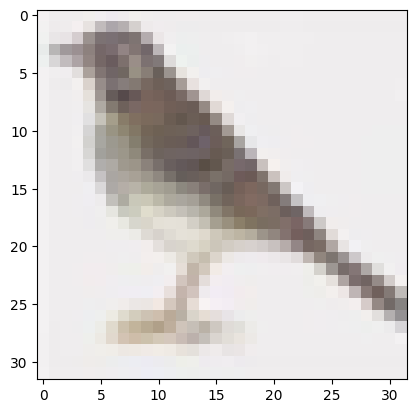

So nay la:  [2]


In [4]:
digit = x_train[5132]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('So nay la: ', y_train[5132])

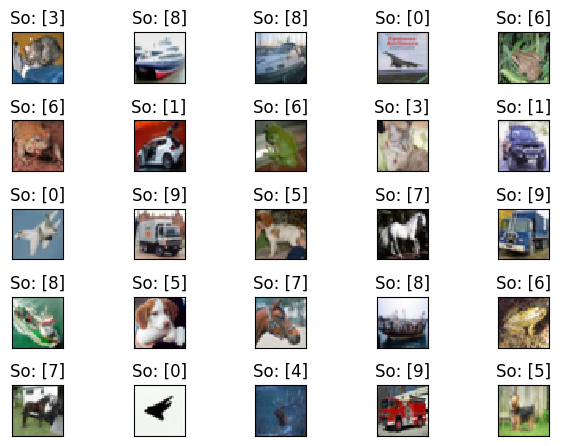

In [5]:
for i in range(25):
  plt.subplot(5,5,i+1)  #ve hinh co 5hang 5cot, i+1: vi tri tuong tac
  plt.tight_layout()
  plt.imshow(x_test[i],cmap='gray',interpolation='none')
  plt.title('So: {}'.format(y_test[i])) # gan nhan cho so
  plt.xticks([])
  plt.yticks([])

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(1000,activation = 'relu', input_shape = (3072,))) 
model.add(Dropout(0.5))

In [7]:
model.add(Dense(10, activation = 'Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255

In [79]:
x_train.shape

(50000, 3072)

In [80]:
x_test.shape

(10000, 3072)

In [9]:
from keras.utils import to_categorical        #chuyen du lieu ve 1 va 0
y_train = to_categorical(y_train, 10)  
y_test = to_categorical(y_test, 10)

In [82]:
y_train.shape

(50000, 10)

In [83]:
y_test.shape

(10000, 10)

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size=500)   # hoc 10 lan, moi lan lay ngau nhien 10 du lieu

Epoch 1/10
250/250 [==============================] - 25s 96ms/step - loss: 2.3737 - accuracy: 0.2287
Epoch 2/10
250/250 [==============================] - 19s 75ms/step - loss: 1.9298 - accuracy: 0.3051
Epoch 3/10
250/250 [==============================] - 20s 80ms/step - loss: 1.8807 - accuracy: 0.3228
Epoch 4/10
250/250 [==============================] - 19s 75ms/step - loss: 1.8432 - accuracy: 0.3369
Epoch 5/10
250/250 [==============================] - 20s 79ms/step - loss: 1.8237 - accuracy: 0.3488
Epoch 6/10
250/250 [==============================] - 21s 82ms/step - loss: 1.8009 - accuracy: 0.3588
Epoch 7/10
250/250 [==============================] - 20s 79ms/step - loss: 1.7870 - accuracy: 0.3620
Epoch 8/10
250/250 [==============================] - 19s 75ms/step - loss: 1.7659 - accuracy: 0.3705
Epoch 9/10
250/250 [==============================] - 20s 80ms/step - loss: 1.7510 - accuracy: 0.3761
Epoch 10/10
250/250 [==============================] - 19s 75ms/step - loss: 1.743

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mat mat: ', test_loss)
print('Do chinh xac:', test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 1.6339 - accuracy: 0.4239
Mat mat:  1.6338735818862915
Do chinh xac: 0.4239000082015991


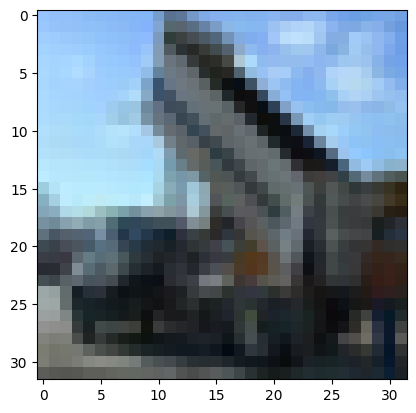

[9]


In [12]:
img = x[50]
plt.imshow(img)
plt.show()
print(y[50])

In [13]:
X_pred = x[10].reshape(1,32*32*3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 150ms/step


array([8])

In [88]:
# SAVE MODEL WITH NAME: cifar10_model.h5

model.save('cifar10_model.h5')

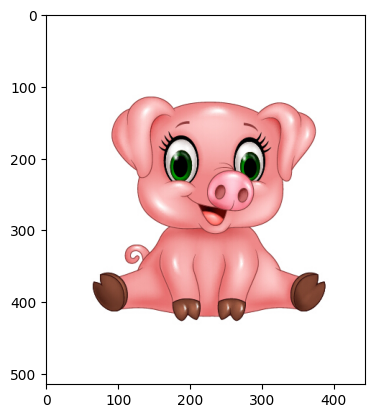

In [90]:
#IMPORT A PICTURE FOR MODEL PREDICT

url = '/content/heo test.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

In [91]:
from keras.utils import load_img, img_to_array

In [92]:
img = load_img(url, target_size = (32,32))

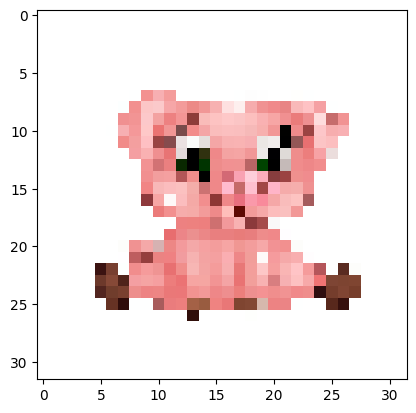

In [93]:
plt.imshow(img)

In [94]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 24ms/step


array([2])

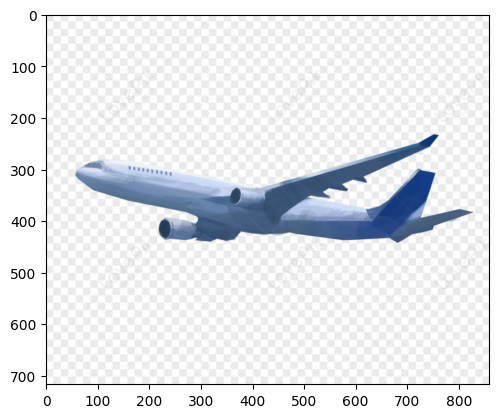

In [95]:
url = '/content/maybay.png'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

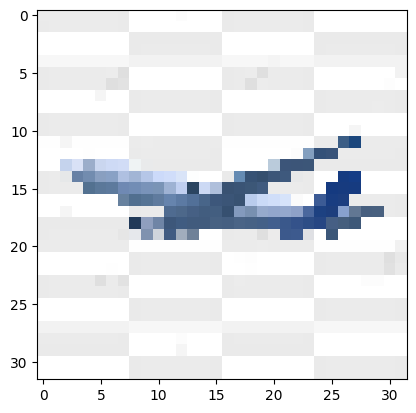

In [96]:
from keras.utils import load_img, img_to_array
img = load_img(url, target_size = (32,32))
plt.imshow(img)

In [97]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 23ms/step


array([0])